# Modeling Your Data - Lab

## Introduction 

In this lab you'll perform a full linear regression on the data. You'll implement the process demonstrated in the previous lesson, taking a stepwise approach to analyze and improve the model along the way.

## Objectives
You will be able to:

* Remove predictors with p-values too high and refit the model
* Examine and interpret the model results
* Split data into training and test sets
* Fit a regression model to the dataset using the `statsmodels` library


## Build an Initial Regression Model

To start, perform a train-test split and create an initial regression model to model the `list_price` using all of your available features.

> **Note:** In order to write the model you'll have to do some tedious manipulation of your column names. Statsmodels will not allow you to have spaces, apostrophe or arithmetic symbols (+) in your column names. Preview them and refine them as you go.  
**If you receive an error such as "PatsyError: error tokenizing input (maybe an unclosed string?)", then you need to further preprocess your column names.**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style('darkgrid')

from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.model_selection import train_test_split

In [2]:
# Import the dataset 'Lego_dataset_cleaned.csv'
df = pd.read_csv('Lego_dataset_cleaned.csv')
df.head()

,piece_count,list_price,num_reviews,play_star_rating,star_rating,val_star_rating,ages_10+,ages_10-14,ages_10-16,ages_10-21,...,country_NZ,country_PL,country_PT,country_US,review_difficulty_Average,review_difficulty_Challenging,review_difficulty_Easy,review_difficulty_Very Challenging,review_difficulty_Very Easy,review_difficulty_unknown
0,-0.273020,29.99,-0.398512,-0.655279,-0.045687,-0.365010,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
1,-0.404154,19.99,-0.398512,-0.655279,0.990651,-0.365010,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
2,-0.517242,12.99,-0.147162,-0.132473,-0.460222,-0.204063,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
3,0.635296,99.99,0.187972,-1.352353,0.161581,0.117830,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
4,0.288812,79.99,-0.063378,-2.049427,0.161581,-0.204063,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0


In [3]:
# Your code here - Manipulate column names
replaces = [(" ","_"),("½","half"),("+","plus"),("™",""),("'",""),("®",""),(".",""),("-","_")]
def col_format(col):
    for old, new in replaces:   
        col = col.replace(old,new)
    return col
    

In [4]:
df.columns = [col_format(col) for col in df.columns]
list(df.columns)

['piece_count',
 'list_price',
 'num_reviews',
 'play_star_rating',
 'star_rating',
 'val_star_rating',
 'ages_10plus',
 'ages_10_14',
 'ages_10_16',
 'ages_10_21',
 'ages_11_16',
 'ages_12plus',
 'ages_12_16',
 'ages_14plus',
 'ages_16plus',
 'ages_1half_3',
 'ages_1half_5',
 'ages_2_5',
 'ages_4plus',
 'ages_4_7',
 'ages_4_99',
 'ages_5plus',
 'ages_5_12',
 'ages_5_8',
 'ages_6plus',
 'ages_6_12',
 'ages_6_14',
 'ages_7plus',
 'ages_7_12',
 'ages_7_14',
 'ages_8plus',
 'ages_8_12',
 'ages_8_14',
 'ages_9plus',
 'ages_9_12',
 'ages_9_14',
 'ages_9_16',
 'theme_name_Angry_Birds',
 'theme_name_Architecture',
 'theme_name_BOOST',
 'theme_name_Blues_Helicopter_Pursuit',
 'theme_name_BrickHeadz',
 'theme_name_Carnotaurus_Gyrosphere_Escape',
 'theme_name_City',
 'theme_name_Classic',
 'theme_name_Creator_3_in_1',
 'theme_name_Creator_Expert',
 'theme_name_DC_Comics_Super_Heroes',
 'theme_name_DC_Super_Hero_Girls',
 'theme_name_DIMENSIONS',
 'theme_name_DUPLO',
 'theme_name_Dilophosaurus_Out

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10870 entries, 0 to 10869
Columns: 103 entries, piece_count to review_difficulty_unknown
dtypes: float64(6), int64(97)
memory usage: 8.5 MB


In [6]:
# Your code here - Define the target and predictors
outcome = 'list_price'
x_cols = list(df.columns)
x_cols.remove('list_price')

In [7]:
# Your code here - Split into train and test
train, test = train_test_split(df)
print(len(train),len(test))
train.head()

8152 2718


,piece_count,list_price,num_reviews,play_star_rating,star_rating,val_star_rating,ages_10plus,ages_10_14,ages_10_16,ages_10_21,...,country_NZ,country_PL,country_PT,country_US,review_difficulty_Average,review_difficulty_Challenging,review_difficulty_Easy,review_difficulty_Very_Challenging,review_difficulty_Very_Easy,review_difficulty_unknown
10059,2.153565,275.4971,0.997879,-1.875158,-0.045687,0.117830,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
397,-0.286253,49.9900,-0.426440,1.087407,0.990651,1.244458,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
2721,-0.597848,3.1122,0.271756,-0.132473,-0.874757,-1.491638,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1844,-0.365656,24.3878,-0.426440,1.087407,0.990651,1.244458,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3275,-0.155119,50.8980,0.187972,0.041796,0.161581,-0.525957,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [8]:
# Your code here - Fit the actual model
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     564.8
Date:                Mon, 14 Oct 2019   Prob (F-statistic):               0.00
Time:                        16:55:58   Log-Likelihood:                -40487.
No. Observations:                8152   AIC:                         8.116e+04
Df Residuals:                    8058   BIC:                         8.182e+04
Df Model:                          93                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           63.8032      1.520     41.965      0.000      60.823      66.784
piece_count                                         77.1230      0.874     88.217      0.000      75.409      78.837
num_reviews                                          6.5543      0.669      9.801      0.000       5.243       7.865
play_star_rating                                     5.1028      0.620      8.225      0.000       3.887       6.319
star_rating                                         -1.1216      0.701     -1.600      0.110      -2.496       0.253
val_star_rating                                     -8.6113      0.623    -13.814      0.000      -9.833      -7.389
ages_10plus                                        116.9376      6.441     18.156      0.000     104.312     129.563
ages_10_14                                         -21.5743      9.066     -2.380      0.017     -39.346      -3.803
ages_10_16                                         -13.1477      3.916     -3.358      0.001     -20.823      -5.472
ages_10_21                                          62.6410      7.264      8.623      0.000      48.401      76.881
ages_11_16                                         -19.0434      5.623     -3.387      0.001     -30.066      -8.021
ages_12plus                                         67.1214      5.445     12.327      0.000      56.448      77.795
ages_12_16                                         -67.2343      6.432    -10.453      0.000     -79.843     -54.626
ages_14plus                                         22.2521      3.895      5.713      0.000      14.617      29.888
ages_16plus                                         33.5198      5.978      5.607      0.000      21.802      45.238
ages_1half_3                                        -8.3205      2.372     -3.508      0.000     -12.970      -3.671
ages_1half_5                                        -3.4755      3.014     -1.153      0.249      -9.384       2.433
ages_2_5                                            14.2811      1.675      8.527      0.000      10.998      17.564
ages_4plus                                         -19.2969      7.704     -2.505      0.012     -34.399      -4.195
ages_4_7                                            -5.9838      3.499     -1.710      0.087     -12.843       0.876
ages_4_99                                           -2.6540      4.266     -0.622      0.534     -11.016       5.708
ages_5plus                                          -9.3147      2.917     -3.193      0.001     -15.032      -3.597
ages_5_12                                          -33.3649      2.983    -11.186      0.000     -39.212     -27.518
ages_5_8                                 

## Remove the Uninfluential Features

Based on the initial model, remove those features which do not appear to be statistically relevant and rerun the model.

In [9]:
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|']<0.05].index)
x_cols.remove('Intercept')
len(x_cols)

70

In [10]:
# Your code here - Remove features which do not appear to be statistically relevant


In [11]:
# Your code here - Refit the model
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     772.7
Date:                Mon, 14 Oct 2019   Prob (F-statistic):               0.00
Time:                        16:56:01   Log-Likelihood:                -40497.
No. Observations:                8152   AIC:                         8.113e+04
Df Residuals:                    8083   BIC:                         8.161e+04
Df Model:                          68                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           65.0158      1.509     43.087      0.000      62.058      67.974
piece_count                                         77.1861      0.860     89.723      0.000      75.500      78.872
num_reviews                                          6.7093      0.662     10.139      0.000       5.412       8.006
play_star_rating                                     4.7856      0.524      9.127      0.000       3.758       5.813
val_star_rating                                     -9.1664      0.488    -18.800      0.000     -10.122      -8.211
ages_10plus                                        123.5604      7.397     16.704      0.000     109.060     138.060
ages_10_14                                         -16.8602      9.490     -1.777      0.076     -35.463       1.743
ages_10_16                                          -9.2963      3.893     -2.388      0.017     -16.927      -1.666
ages_10_21                                          69.5529      8.024      8.669      0.000      53.825      85.281
ages_11_16                                         -15.3136      5.562     -2.753      0.006     -26.217      -4.410
ages_12plus                                         72.5464      6.514     11.137      0.000      59.777      85.316
ages_12_16                                         -63.1189      6.851     -9.213      0.000     -76.548     -49.690
ages_14plus                                         26.8421      4.692      5.721      0.000      17.645      36.039
ages_16plus                                         37.0113      6.840      5.411      0.000      23.603      50.420
ages_1half_3                                        -1.8451      3.057     -0.604      0.546      -7.837       4.146
ages_2_5                                            20.2463      2.003     10.107      0.000      16.319      24.173
ages_4plus                                         -18.8215     11.737     -1.604      0.109     -41.830       4.187
ages_5plus                                          -8.1552      2.878     -2.833      0.005     -13.798      -2.513
ages_5_12                                          -27.2366      2.685    -10.146      0.000     -32.499     -21.974
ages_6plus                                         -19.7784      5.563     -3.555      0.000     -30.684      -8.873
ages_6_12                                          -16.2191      1.874     -8.656      0.000     -19.892     -12.546
ages_7plus                                       -9.406e-14   1.72e-14     -5.462      0.000   -1.28e-13   -6.03e-14
ages_7_12                                          -14.8651      2.204     -6.744      0.000     -19.186     -10.545
ages_7_14                                

> **Comment:** You should see that the model performance is identical. Additionally, observe that there are further features which have been identified as unimpactful. Continue to refine the model accordingly.

In [12]:
# Your code here - Continue to refine the model
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|']<0.05].index)
x_cols.remove('Intercept')
len(x_cols)

62

In [13]:
# Your code here - Refit the model
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     874.2
Date:                Mon, 14 Oct 2019   Prob (F-statistic):               0.00
Time:                        16:56:06   Log-Likelihood:                -40506.
No. Observations:                8152   AIC:                         8.113e+04
Df Residuals:                    8091   BIC:                         8.156e+04
Df Model:                          60                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           65.1713      1.349     48.304      0.000      62.527      67.816
piece_count                                         77.2612      0.860     89.849      0.000      75.576      78.947
num_reviews                                          6.4823      0.637     10.171      0.000       5.233       7.732
play_star_rating                                     4.8499      0.523      9.274      0.000       3.825       5.875
val_star_rating                                     -9.1914      0.486    -18.896      0.000     -10.145      -8.238
ages_10plus                                        124.3464      7.365     16.883      0.000     109.909     138.784
ages_10_16                                          -8.3281      3.830     -2.174      0.030     -15.836      -0.820
ages_10_21                                          69.8274      8.012      8.715      0.000      54.121      85.534
ages_11_16                                         -14.4939      5.527     -2.622      0.009     -25.329      -3.659
ages_12plus                                         73.6721      6.493     11.346      0.000      60.944      86.401
ages_12_16                                         -61.8398      6.820     -9.068      0.000     -75.208     -48.471
ages_14plus                                         29.1742      4.617      6.319      0.000      20.123      38.225
ages_16plus                                         39.1780      6.791      5.769      0.000      25.866      52.490
ages_2_5                                            20.7175      1.906     10.870      0.000      16.982      24.453
ages_5plus                                          -7.8013      2.864     -2.724      0.006     -13.415      -2.187
ages_5_12                                          -25.7857      2.598     -9.927      0.000     -30.877     -20.694
ages_6plus                                         -18.6092      5.530     -3.365      0.001     -29.450      -7.769
ages_6_12                                          -14.6754      1.738     -8.442      0.000     -18.083     -11.268
ages_7plus                                        1.106e-12   1.07e-13     10.345      0.000    8.96e-13    1.32e-12
ages_7_12                                          -14.0409      2.112     -6.650      0.000     -18.180      -9.902
ages_7_14                                          -10.2682      1.852     -5.545      0.000     -13.898      -6.638
ages_8plus                                          23.3696      4.944      4.727      0.000      13.678      33.061
ages_8_12                                          -14.3863      2.657     -5.414      0.000     -19.596      -9.177
ages_8_14                                

## Investigate Multicollinearity

There are still a lot of features in the current model! Chances are there are some strong multicollinearity issues. Begin to investigate the extent of this problem.

In [14]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [15]:
# Your code here - Code a way to identify multicollinearity

X = df[x_cols]
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(x_cols, vif))


/opt/conda/envs/learn-env/lib/python3.6/site-packages/statsmodels/stats/outliers_influence.py:181: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


[('piece_count', 4.544042150923775),
 ('num_reviews', 2.6068885596460074),
 ('play_star_rating', 1.816182978753602),
 ('val_star_rating', 1.6275545716875908),
 ('ages_10plus', 17.772593549709317),
 ('ages_10_16', 1.169538347477615),
 ('ages_10_21', 7.166909249635046),
 ('ages_11_16', 1.156430813189713),
 ('ages_12plus', 7.232715610403698),
 ('ages_12_16', 1.1986936845023692),
 ('ages_14plus', 2.214016865907711),
 ('ages_16plus', 9.476464164128458),
 ('ages_2_5', 1.1819034731522398),
 ('ages_5plus', inf),
 ('ages_5_12', 3.140320596755112),
 ('ages_6plus', 2.658836897786949),
 ('ages_6_12', 1.7832850675611653),
 ('ages_7plus', 1.0111707024733576),
 ('ages_7_12', 1.4601047596271728),
 ('ages_7_14', 1.8725098500687507),
 ('ages_8plus', 3.33628528287014),
 ('ages_8_12', 1.2661091501162274),
 ('ages_8_14', 1.975161299470656),
 ('ages_9plus', 1.5486576062765807),
 ('ages_9_12', 1.0182806007443188),
 ('ages_9_14', 1.85889783572988),
 ('theme_name_Architecture', 5.911667856709387),
 ('theme_nam

## Perform Another Round of Feature Selection

Once again, subset your features based on your findings above. Then rerun the model once again.

In [16]:
# Your code here - Subset features based on multicollinearity
vif_scores = list(zip(x_cols, vif))
x_cols = [x for x,vif in vif_scores if vif < 5]
print(len(vif_scores), len(x_cols))

62 53


In [17]:
# Your code here - Refit model with subset features
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     908.2
Date:                Mon, 14 Oct 2019   Prob (F-statistic):               0.00
Time:                        16:57:10   Log-Likelihood:                -40878.
No. Observations:                8152   AIC:                         8.186e+04
Df Residuals:                    8099   BIC:                         8.223e+04
Df Model:                          52                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           70.5504      1.052     67.060      0.000      68.488      72.613
piece_count                                         79.2266      0.669    118.484      0.000      77.916      80.537
num_reviews                                          4.8741      0.612      7.959      0.000       3.674       6.075
play_star_rating                                     6.2866      0.484     12.989      0.000       5.338       7.235
val_star_rating                                    -10.6999      0.483    -22.170      0.000     -11.646      -9.754
ages_10_16                                         -17.7803      3.729     -4.768      0.000     -25.090     -10.471
ages_11_16                                         -27.0757      5.387     -5.026      0.000     -37.636     -16.516
ages_12_16                                         -76.4198      6.582    -11.611      0.000     -89.322     -63.518
ages_14plus                                          6.5223      3.879      1.681      0.093      -1.082      14.127
ages_2_5                                            15.8167      1.820      8.689      0.000      12.249      19.385
ages_5_12                                          -31.8183      2.602    -12.230      0.000     -36.918     -26.719
ages_6plus                                         -25.4858      5.723     -4.453      0.000     -36.705     -14.267
ages_6_12                                          -22.0214      1.599    -13.775      0.000     -25.155     -18.888
ages_7plus                                       -1.041e-13   1.09e-14     -9.518      0.000   -1.26e-13   -8.26e-14
ages_7_12                                          -20.6932      2.030    -10.196      0.000     -24.672     -16.715
ages_7_14                                          -17.2497      1.753     -9.838      0.000     -20.687     -13.813
ages_8plus                                           2.2294      4.461      0.500      0.617      -6.515      10.974
ages_8_12                                          -20.8839      2.558     -8.164      0.000     -25.899     -15.869
ages_8_14                                          -18.4815      1.857     -9.953      0.000     -22.121     -14.842
ages_9plus                                          19.2048      9.697      1.981      0.048       0.197      38.212
ages_9_12                                          -31.9122      6.213     -5.136      0.000     -44.091     -19.733
ages_9_14                                          -17.9736      2.553     -7.041      0.000     -22.977     -12.970
theme_name_BOOST                                    87.2830     10.392      8.399      0.000      66.912     107.654
theme_name_Blues_Helicopter_Pursuit      

## Check the Normality Assumption

Check whether the normality assumption holds for your model.

In [18]:
import statsmodels.api as sm
import scipy.stats as stats

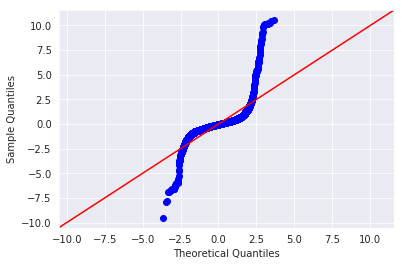

In [19]:
# Your code here - Check that the residuals are normally distributed
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

## Check Homoscedasticity Assumption

Check whether the model's errors are indeed homoscedastic or if they violate this principle and display heteroscedasticity.

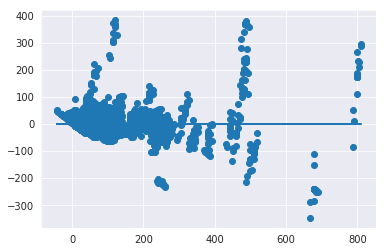

In [20]:
# Your code here - Check that the residuals are homoscedastic
plt.scatter(model.predict(train[x_cols]), model.resid)
plt.plot(model.predict(train[x_cols]), [0 for i in range(len(train))])

> **Comment:** This displays a fairly pronounced 'funnel' shape: errors appear to increase as the `list_price` increases. This doesn't bode well for our model. Subsetting the data to remove outliers and confiding the model to this restricted domain may be necessary. A log transformation or something equivalent may also be appropriate.

## Make Additional Refinements

From here, make additional refinements to your model based on the above analysis. As you progress, continue to go back and check the assumptions for the updated model. Be sure to attempt at least two additional model refinements.

> **Comment:** Based on the above plots, it seems as though outliers are having a substantial impact on the model. As such, removing outliers may be appropriate. Investigating the impact of a log transformation is also worthwhile.

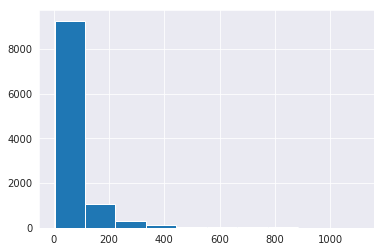

In [21]:
# Your code here - Check for outliers
df.list_price.hist()

In [22]:
# Your code here
# Remove extreme outliers
for i in range(80, 100):
    q = i / 100
    print('{} percentile: {}'.format(q, df['list_price'].quantile(q=q)))

# Rerun the model

0.8 percentile: 90.986
0.81 percentile: 92.66216100000052
0.82 percentile: 97.5878
0.83 percentile: 101.898
0.84 percentile: 109.13971199999885
0.85 percentile: 110.352
0.86 percentile: 119.96492
0.87 percentile: 121.9878
0.88 percentile: 121.9878
0.89 percentile: 134.18779999999998
0.9 percentile: 143.952
0.91 percentile: 153.986
0.92 percentile: 170.7878
0.93 percentile: 182.9878
0.94 percentile: 198.7929
0.95 percentile: 220.03032999999942
0.96 percentile: 251.90543999999994
0.97 percentile: 292.7878
0.98 percentile: 359.88
0.99 percentile: 463.5878


In [23]:
orig_tot = len(df)
df = df[df.list_price<450]
print('Percent removed:',(orig_tot - len(df))/orig_tot)
df.list_price = df.list_price.map(np.log)
train, test = train_test_split(df)

Percent removed: 0.010487580496780129


In [24]:
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     454.0
Date:                Mon, 14 Oct 2019   Prob (F-statistic):               0.00
Time:                        16:57:22   Log-Likelihood:                -5001.1
No. Observations:                8067   AIC:                         1.011e+04
Df Residuals:                    8013   BIC:                         1.049e+04
Df Model:                          53                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                            3.3972      0.013    254.856      0.000       3.371       3.423
piece_count                                          0.5723      0.010     56.848      0.000       0.553       0.592
num_reviews                                         -0.0148      0.008     -1.885      0.059      -0.030       0.001
play_star_rating                                     0.1121      0.006     18.691      0.000       0.100       0.124
val_star_rating                                     -0.1563      0.006    -25.785      0.000      -0.168      -0.144
ages_10_16                                           0.6118      0.048     12.864      0.000       0.519       0.705
ages_11_16                                           0.4245      0.070      6.046      0.000       0.287       0.562
ages_12_16                                           0.0194      0.088      0.221      0.825      -0.153       0.192
ages_14plus                                          0.4844      0.053      9.150      0.000       0.381       0.588
ages_2_5                                             0.4554      0.022     20.403      0.000       0.412       0.499
ages_5_12                                           -0.7092      0.032    -22.192      0.000      -0.772      -0.647
ages_6plus                                          -0.9499      0.068    -14.002      0.000      -1.083      -0.817
ages_6_12                                           -0.1259      0.020     -6.388      0.000      -0.165      -0.087
ages_7plus                                          -0.0256      0.321     -0.080      0.936      -0.656       0.604
ages_7_12                                            0.1174      0.025      4.731      0.000       0.069       0.166
ages_7_14                                            0.0203      0.022      0.936      0.349      -0.022       0.063
ages_8plus                                           0.5471      0.055      9.919      0.000       0.439       0.655
ages_8_12                                            0.2946      0.032      9.172      0.000       0.232       0.358
ages_8_14                                            0.3641      0.023     15.633      0.000       0.318       0.410
ages_9plus                                           0.1652      0.125      1.319      0.187      -0.080       0.411
ages_9_12                                            0.4128      0.085      4.846      0.000       0.246       0.580
ages_9_14                                            0.5449      0.032     16.791      0.000       0.481       0.609
theme_name_BOOST                                     1.0712      0.133      8.031      0.000       0.810       1.333
theme_name_Blues_Helicopter_Pursuit      

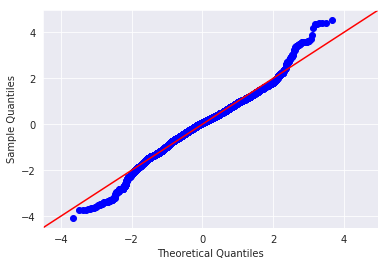

In [25]:
# Your code here - Check normality assumption
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

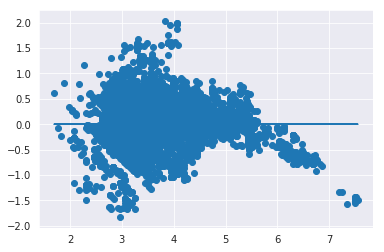

In [26]:
# Your code here - Check the Homoscedasticity Assumption
plt.scatter(model.predict(train[x_cols]), model.resid)
plt.plot(model.predict(train[x_cols]), [0 for i in range(len(train))])

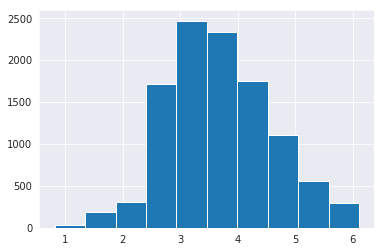

In [27]:
# Your code goes here
df.list_price.hist()

In [28]:
df = df[df.list_price <= 6]
train, test = train_test_split(df)

In [29]:
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     452.1
Date:                Mon, 14 Oct 2019   Prob (F-statistic):               0.00
Time:                        16:57:34   Log-Likelihood:                -4918.6
No. Observations:                8027   AIC:                             9945.
Df Residuals:                    7973   BIC:                         1.032e+04
Df Model:                          53                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                            3.4042      0.014    250.768      0.000       3.378       3.431
piece_count                                          0.6306      0.011     55.735      0.000       0.608       0.653
num_reviews                                         -0.0117      0.008     -1.430      0.153      -0.028       0.004
play_star_rating                                     0.1054      0.006     17.737      0.000       0.094       0.117
val_star_rating                                     -0.1504      0.006    -25.044      0.000      -0.162      -0.139
ages_10_16                                           0.5946      0.045     13.105      0.000       0.506       0.683
ages_11_16                                           0.2551      0.068      3.764      0.000       0.122       0.388
ages_12_16                                          -0.0788      0.087     -0.902      0.367      -0.250       0.092
ages_14plus                                          0.4087      0.054      7.615      0.000       0.304       0.514
ages_2_5                                             0.5198      0.022     23.634      0.000       0.477       0.563
ages_5_12                                           -0.6837      0.032    -21.515      0.000      -0.746      -0.621
ages_6plus                                          -0.9457      0.073    -13.024      0.000      -1.088      -0.803
ages_6_12                                           -0.1153      0.020     -5.857      0.000      -0.154      -0.077
ages_7plus                                          -0.0431      0.450     -0.096      0.924      -0.925       0.839
ages_7_12                                            0.1413      0.025      5.598      0.000       0.092       0.191
ages_7_14                                            0.0352      0.022      1.631      0.103      -0.007       0.077
ages_8plus                                           0.5524      0.054     10.163      0.000       0.446       0.659
ages_8_12                                            0.2903      0.032      9.048      0.000       0.227       0.353
ages_8_14                                            0.3781      0.023     16.210      0.000       0.332       0.424
ages_9plus                                           0.2001      0.123      1.625      0.104      -0.041       0.441
ages_9_12                                            0.4018      0.079      5.118      0.000       0.248       0.556
ages_9_14                                            0.5377      0.032     16.594      0.000       0.474       0.601
theme_name_BOOST                                     1.0229      0.119      8.575      0.000       0.789       1.257
theme_name_Blues_Helicopter_Pursuit      

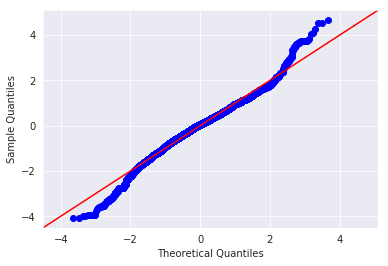

In [30]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

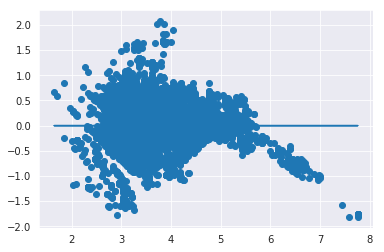

In [31]:
plt.scatter(model.predict(train[x_cols]), model.resid)
plt.plot(model.predict(train[x_cols]), [0 for i in range(len(train))])

## Summary

Well done! As you can see, regression can be a challenging task that requires you to make decisions along the way, try alternative approaches and make ongoing refinements. These choices depend on the context and specific use cases. 